# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

df = pd.read_csv('df_credito_modificado.csv')

df.drop(columns = 'Unnamed: 0', inplace = True)
df

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo_M,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,58.832877,3.106849,1,0,0,0,2.0,0,1,...,1,1,0,0,0,1,0,0,0,0
1,0,52.356164,8.358904,1,0,1,1,1.0,0,0,...,1,0,0,1,0,1,0,0,0,0
2,0,52.356164,8.358904,1,0,1,1,1.0,0,0,...,1,0,0,1,0,1,0,0,0,0
3,0,46.224658,2.106849,1,1,1,1,2.0,0,1,...,0,1,0,0,0,1,0,0,0,0
4,0,29.230137,3.021918,1,0,0,0,2.0,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,0,54.109589,9.884932,1,0,0,0,2.0,1,0,...,1,0,0,0,0,1,0,0,0,0
16646,0,43.389041,7.380822,1,1,1,0,2.0,1,0,...,1,1,0,0,0,1,0,0,0,0
16647,0,30.005479,9.800000,1,1,0,0,2.0,1,1,...,1,1,0,0,0,1,0,0,0,0
16648,0,30.005479,9.800000,1,1,0,0,2.0,1,1,...,1,1,0,0,0,1,0,0,0,0


In [2]:
df.dtypes

qtd_filhos                                  int64
idade                                     float64
tempo_emprego                             float64
possui_celular                              int64
possui_fone_comercial                       int64
possui_fone                                 int64
possui_email                                int64
qt_pessoas_residencia                     float64
mau                                         int64
sexo_M                                      int64
posse_de_veiculo_Y                          int64
posse_de_imovel_Y                           int64
tipo_renda_Pensioner                        int64
tipo_renda_State servant                    int64
tipo_renda_Student                          int64
tipo_renda_Working                          int64
educacao_Higher education                   int64
educacao_Incomplete higher                  int64
educacao_Lower secondary                    int64
educacao_Secondary / secondary special      int64


In [65]:
x = df.drop(columns = "mau")
y = df['mau']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, train_size=0.7)

y_train

8181     0
14951    0
4712     0
9330     0
7637     0
        ..
8290     0
8990     0
8378     0
2201     0
9227     0
Name: mau, Length: 11655, dtype: int64

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [66]:
clf = DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)

clf

DecisionTreeClassifier()

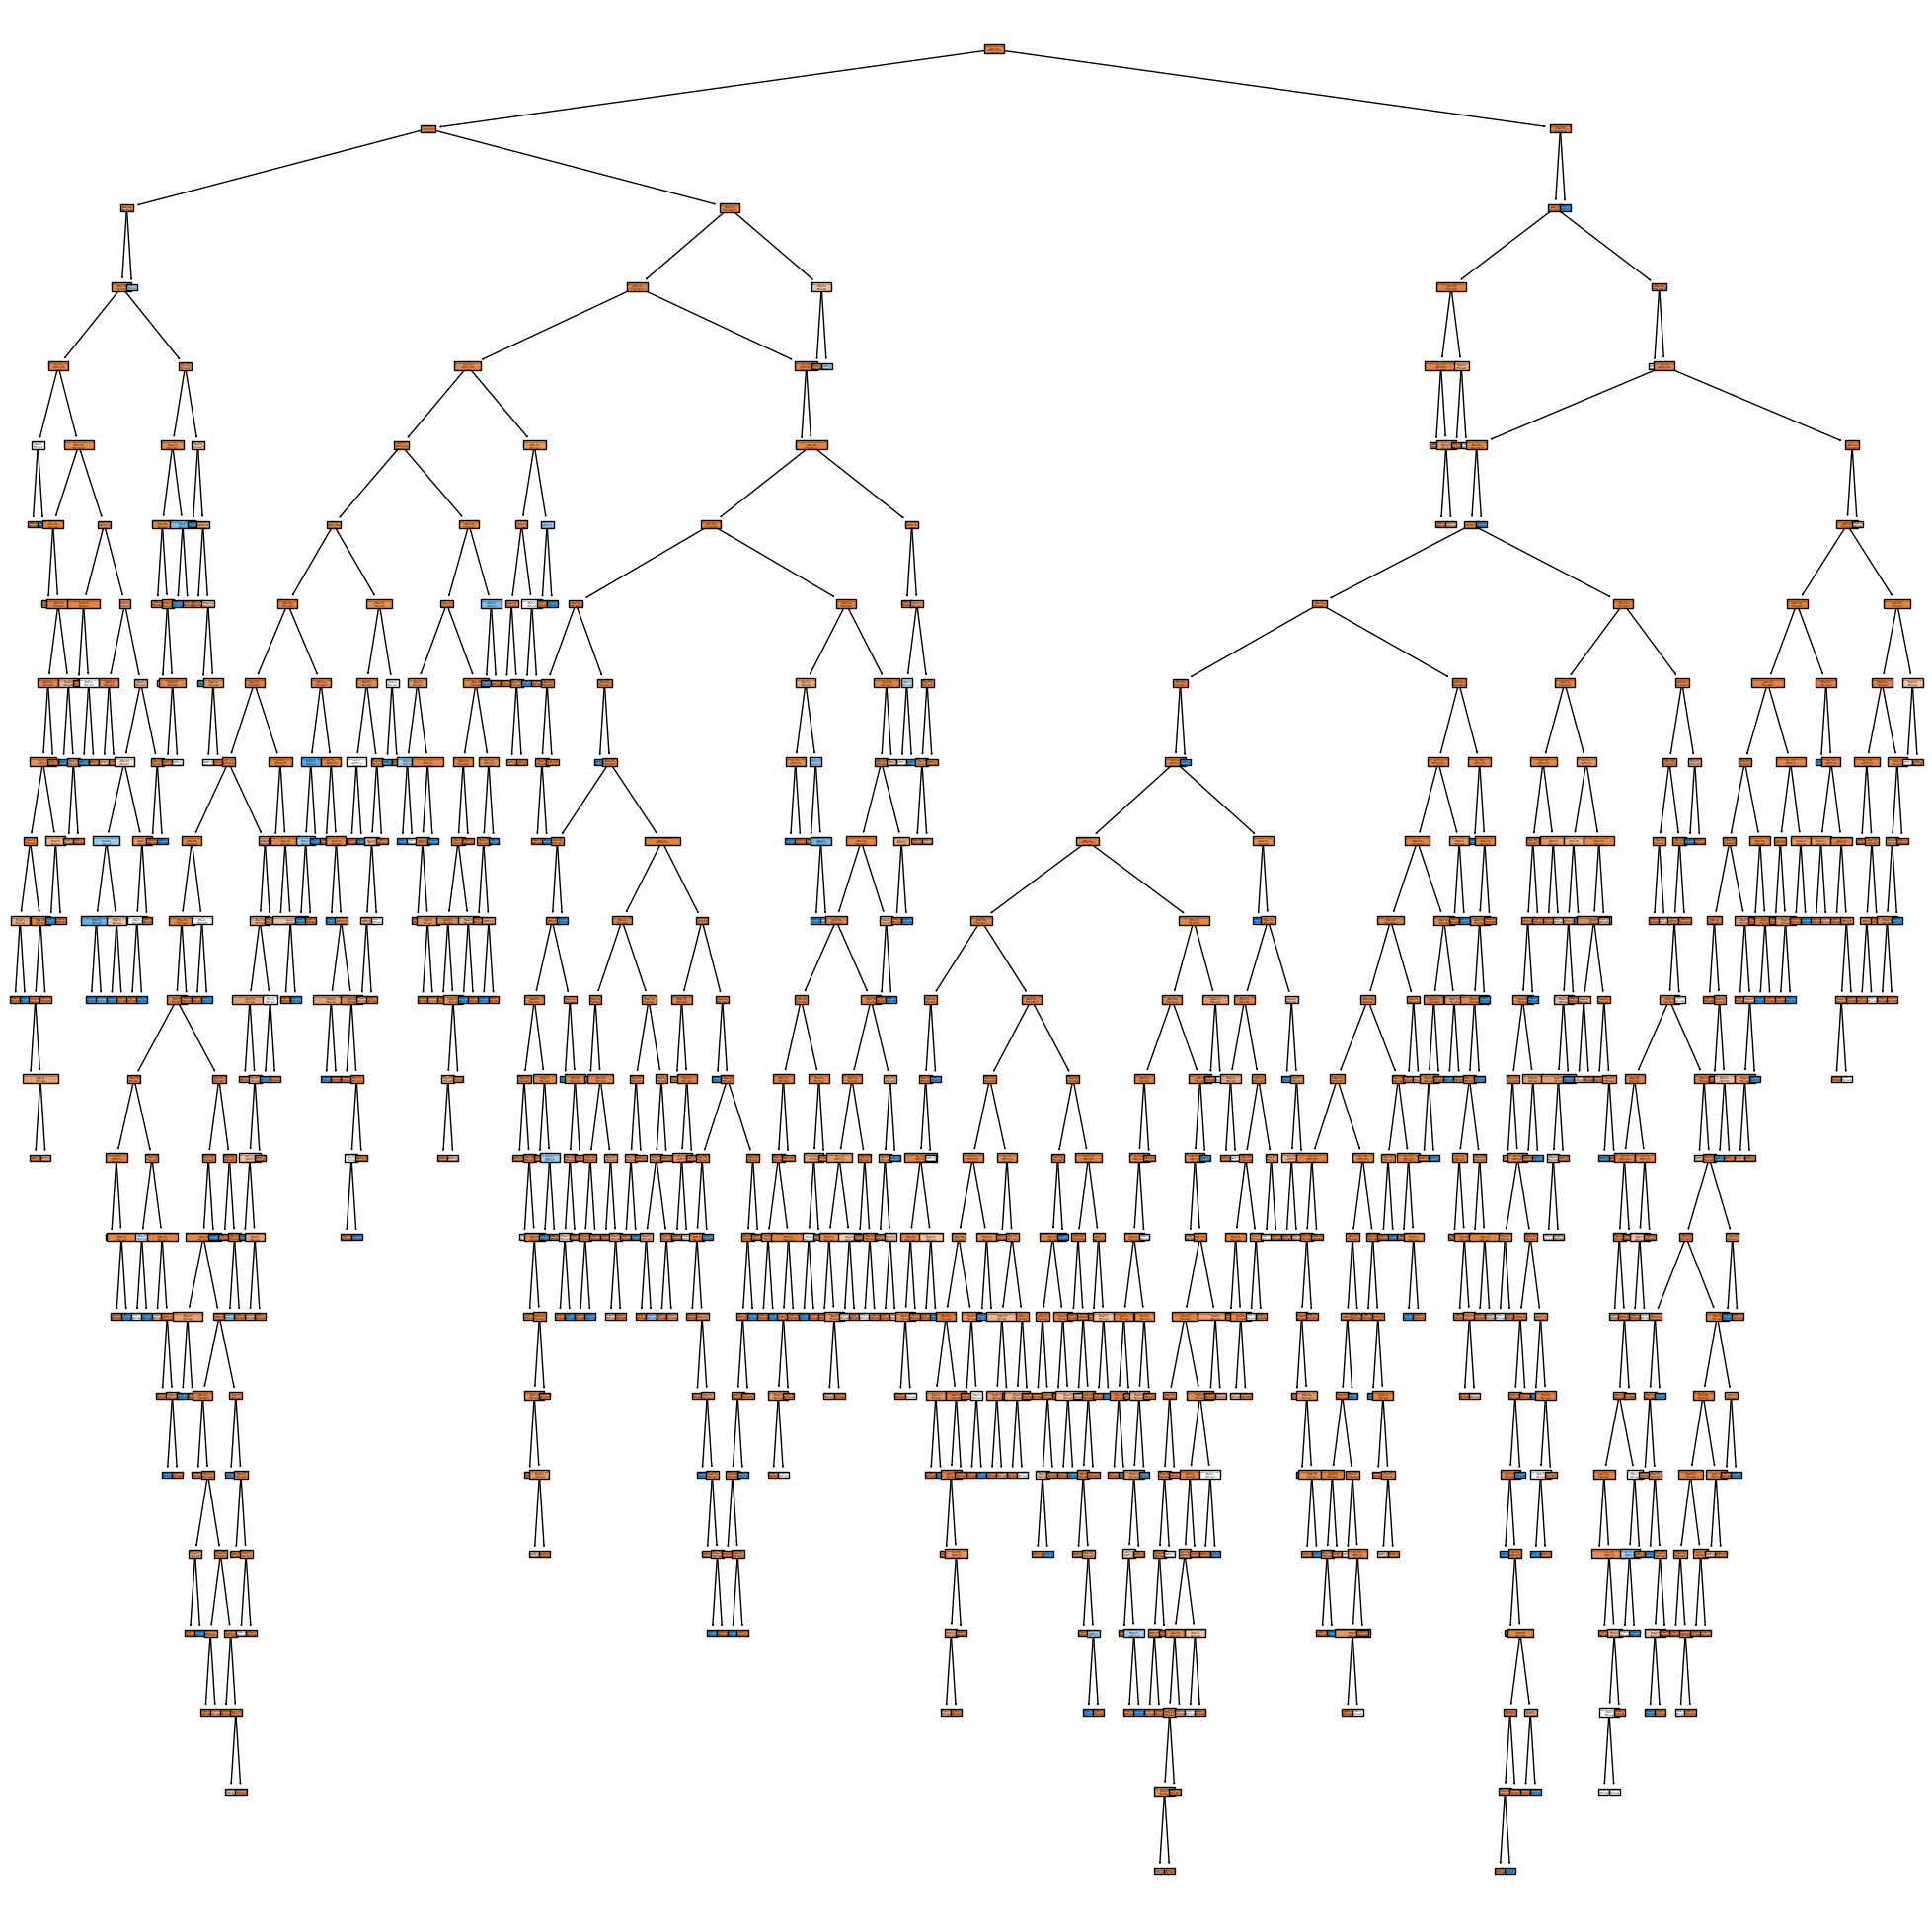

In [67]:
plt.figure(figsize=(25, 25))
plot_tree(clf,
          filled=True,
          class_names=['mau','bom'],
          feature_names=list(x_train.columns));

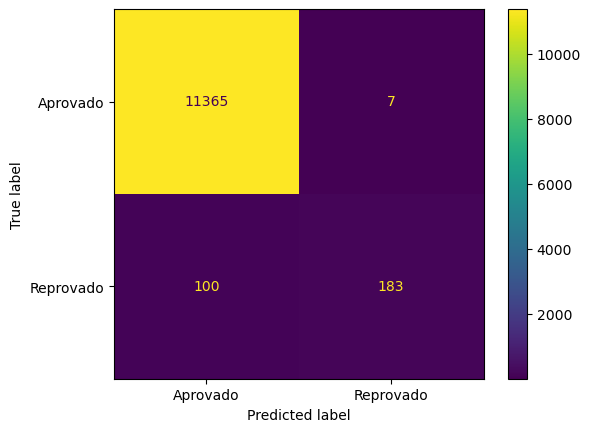

In [68]:
ConfusionMatrixDisplay.from_estimator(clf, x_train, y_train, display_labels=['Aprovado','Reprovado'])

In [69]:
predict = clf.predict(x_train)

acc_train = accuracy_score(y_train, predict)
acc_train * 100

99.08193908193908

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [70]:
predict_test = clf.predict(x_test)

predict_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

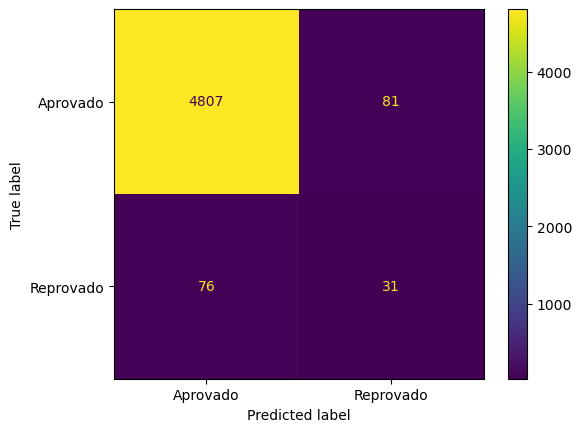

In [71]:
ConfusionMatrixDisplay.from_estimator(clf, x_test, y_test, display_labels=['Aprovado','Reprovado'])

In [72]:
acc_test = accuracy_score(y_test, predict_test)
acc_test * 100

96.85685685685685

In [73]:
(acc_train - acc_test) * 100

2.225082225082231

In [74]:
clf = DecisionTreeClassifier(min_samples_leaf=5,max_depth=10, random_state=123)
clf = clf.fit(x_train,y_train)
clf

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)

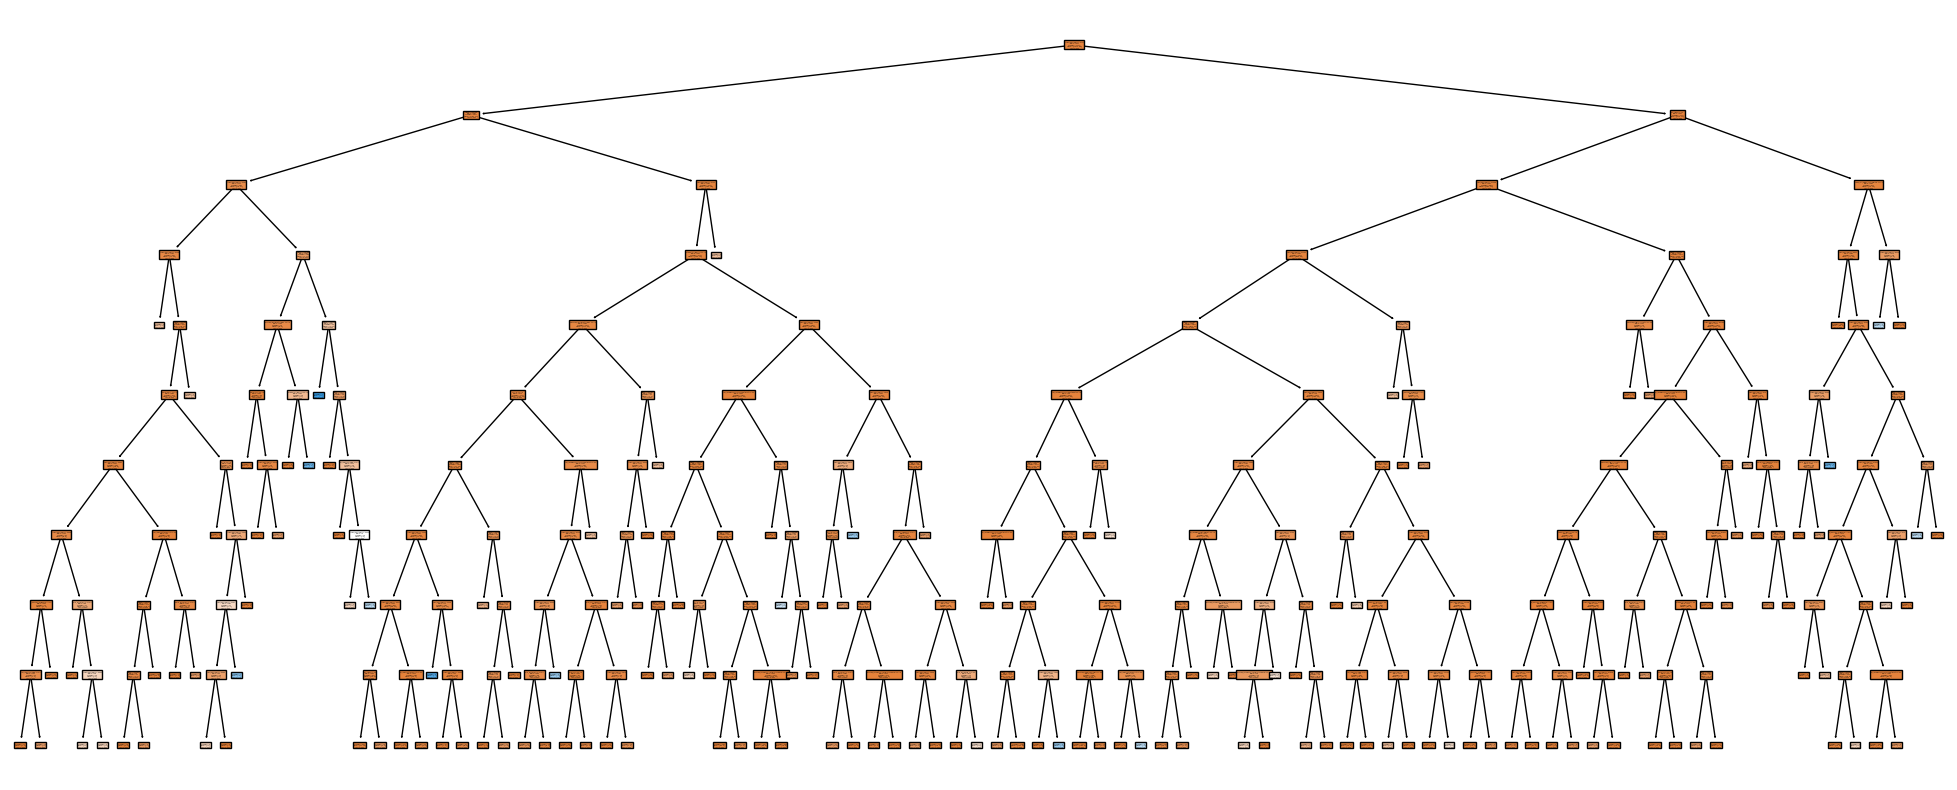

In [75]:
plt.figure(figsize=(25, 10))
plot_tree(clf,
          filled=True,
          class_names=['mau','bom'],
          feature_names=list(x_test.columns));

In [76]:
conf_matrix = confusion_matrix(y_test, predict_test)
conf_matrix

array([[4807,   81],
       [  76,   31]], dtype=int64)

In [77]:
(conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1])) * 100
# Proporção de proponentes classificados como "mau"

28.971962616822427

In [80]:
y_test.iloc[:] = 0
accuracy_score(y_test, predict_test)


0.9775775775775776